In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
data = pd.read_csv("candy.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [3]:
data.columns = ['competitorname', 'chocolate', 'fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']
data['result'] = data['winpercent'].apply(lambda x: 1 if x >= 50 else 0)

In [4]:
data.dropna(inplace=True)
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,result
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


In [5]:
label_encoder = LabelEncoder()
data["competitorname"] = label_encoder.fit_transform(data["competitorname"])
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,result
0,0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,44,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,45,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,2,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
81,81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
82,82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0
83,83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0


In [6]:
# Separate features and target variable
X = data.drop(columns=["result"])
y = data["result"]

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Define the Classification model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
## Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.4614 - loss: 0.6846 - val_accuracy: 0.6471 - val_loss: 0.6406
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5719 - loss: 0.6495 - val_accuracy: 0.7647 - val_loss: 0.6278
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6429 - loss: 0.6071 - val_accuracy: 0.5882 - val_loss: 0.6137
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7842 - loss: 0.5658 - val_accuracy: 0.6471 - val_loss: 0.6006
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8063 - loss: 0.5558 - val_accuracy: 0.6471 - val_loss: 0.5873
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8366 - loss: 0.5231 - val_accuracy: 0.6471 - val_loss: 0.5797
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8596 - loss: 0.4779 - val_accuracy: 0.6471 - val_loss: 0.5729
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8410 - loss: 0.4488 - val_accuracy: 0.6471 - val_loss

In [12]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0858
Classification Loss: 0.08580393344163895
Classification Accuracy: 1.0


In [13]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [14]:
print(y_test.isnull().sum())

0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


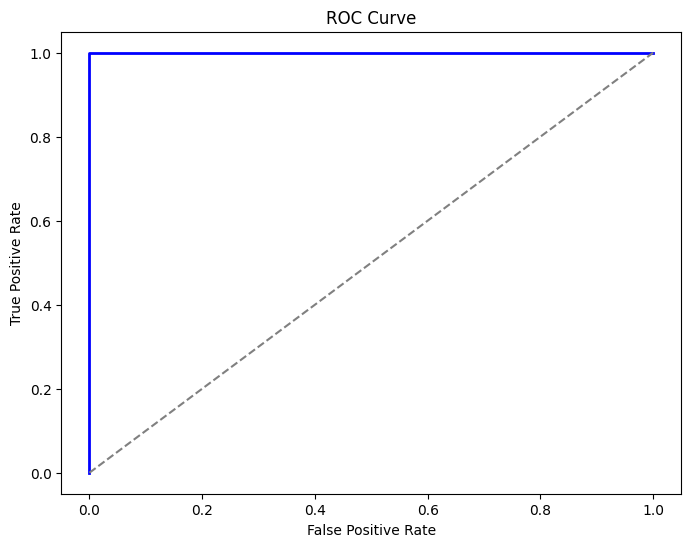

In [15]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [16]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

AUC Score: 1.0


In [17]:
# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 6  0]
 [ 0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [18]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

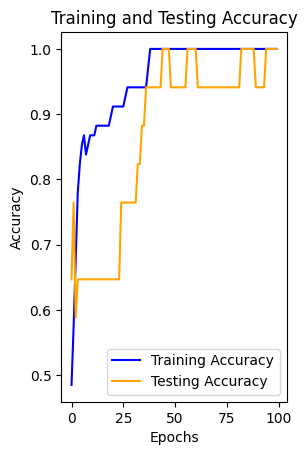

In [19]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

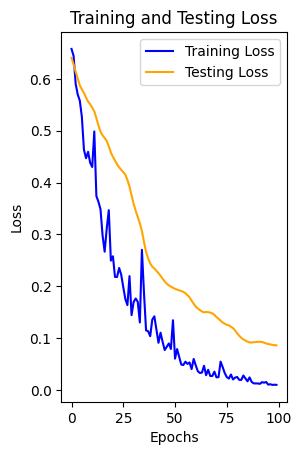

In [20]:
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>